### Naive bayes 

Neste notebook será realizado a aplicação do modelo de naive bayes com dois tipos de word2vec, sendo o primeiro caso utilizando o modelo word2vec feito com o corpus do projeto e a segunda análise com o word2vec pré processado CBOW 50 dimensões" do site do NILC (http://nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc)

#### Importando as bibliotecas

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### Processando com o word2vec feito com o corpus

In [2]:
df_corpus = pd.read_csv('../output/word2vec_corpus.csv', index_col=0)

In [3]:
# Removendo NaN das bases para facilitar o treinamento 
df_without_NaN = df_corpus.dropna()


In [4]:
df_without_NaN

,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,Vetor10,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
Frase,,,,,,,,,,,,,,,,,,,,,
"['minuto', 'touro', 'ouro']",0.078066,-0.681861,-0.242816,-0.287935,-0.052421,0.331101,-0.139809,-0.379450,0.267952,0.175391,...,-0.211810,0.132065,-0.106570,0.100519,0.056235,0.211425,0.015619,-0.055449,-0.076335,1
['sim'],0.219127,-0.408984,-0.176726,-0.270843,0.154609,0.169897,-0.016856,-0.248304,0.197370,0.042259,...,-0.338304,0.263537,0.065959,0.021564,0.175807,0.181400,-0.136190,-0.056663,-0.056629,0
"['queria', 'saber', 'banking', 'própria']",0.139843,-0.536218,-0.217435,-0.219593,-0.017553,0.193954,-0.051410,-0.258538,0.166662,0.045931,...,-0.251460,0.155440,-0.043917,0.123936,0.185161,0.097498,-0.046922,-0.040375,-0.083413,1
"['palmas', 'palmas', 'palmas', 'palmas']",0.146434,-0.234622,-0.173836,-0.255587,0.160331,0.161181,-0.023813,-0.191149,0.076497,0.059744,...,-0.356565,0.168509,0.098124,0.088115,0.154685,0.217300,-0.187343,-0.033554,-0.157490,1
"['vamos', 'ajudar', 'brasil', 'principal', 'categoria', 'automobilismo']",0.151519,-0.500928,-0.217571,-0.271197,-0.014306,0.233144,-0.057781,-0.306150,0.215858,0.078090,...,-0.231650,0.143755,-0.044758,0.106567,0.123410,0.163982,-0.049926,-0.079451,-0.083599,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['excelente', 'explicação']",0.233356,-0.433924,-0.272217,-0.314453,-0.036260,0.256107,-0.033117,-0.292216,0.242472,0.049855,...,-0.156774,0.208884,-0.075381,0.039420,0.062635,0.112375,-0.058631,-0.109948,-0.073896,-1
"['porque', 'brg', 'tá', 'diminuído', 'limite', 'cartão', 'sempre', 'pagamos', 'fatura', 'dia']",0.156947,-0.584779,-0.194561,-0.271622,-0.046859,0.263095,-0.090514,-0.318417,0.241259,0.097010,...,-0.234681,0.149967,-0.067125,0.093000,0.116992,0.154841,-0.043088,-0.060749,-0.081761,-1
"['atendam', 'telefone', 'amor', 'deus']",0.145733,-0.585372,-0.215295,-0.317303,-0.041272,0.284987,-0.116252,-0.368979,0.256614,0.119593,...,-0.231181,0.162746,-0.076660,0.088449,0.105912,0.181612,-0.021021,-0.070964,-0.086959,-1


### Separando o dataset em treino e teste

O Dataset é necessário 

In [5]:
target_corpus = df_without_NaN['sentimento']

In [6]:
features_corpus = df_without_NaN.iloc[:,0:50]


In [7]:
features_corpus

,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,Vetor10,...,Vetor41,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50
Frase,,,,,,,,,,,,,,,,,,,,,
"['minuto', 'touro', 'ouro']",0.078066,-0.681861,-0.242816,-0.287935,-0.052421,0.331101,-0.139809,-0.379450,0.267952,0.175391,...,0.108236,-0.211810,0.132065,-0.106570,0.100519,0.056235,0.211425,0.015619,-0.055449,-0.076335
['sim'],0.219127,-0.408984,-0.176726,-0.270843,0.154609,0.169897,-0.016856,-0.248304,0.197370,0.042259,...,0.225978,-0.338304,0.263537,0.065959,0.021564,0.175807,0.181400,-0.136190,-0.056663,-0.056629
"['queria', 'saber', 'banking', 'própria']",0.139843,-0.536218,-0.217435,-0.219593,-0.017553,0.193954,-0.051410,-0.258538,0.166662,0.045931,...,0.164212,-0.251460,0.155440,-0.043917,0.123936,0.185161,0.097498,-0.046922,-0.040375,-0.083413
"['palmas', 'palmas', 'palmas', 'palmas']",0.146434,-0.234622,-0.173836,-0.255587,0.160331,0.161181,-0.023813,-0.191149,0.076497,0.059744,...,0.334026,-0.356565,0.168509,0.098124,0.088115,0.154685,0.217300,-0.187343,-0.033554,-0.157490
"['vamos', 'ajudar', 'brasil', 'principal', 'categoria', 'automobilismo']",0.151519,-0.500928,-0.217571,-0.271197,-0.014306,0.233144,-0.057781,-0.306150,0.215858,0.078090,...,0.181589,-0.231650,0.143755,-0.044758,0.106567,0.123410,0.163982,-0.049926,-0.079451,-0.083599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['excelente', 'explicação']",0.233356,-0.433924,-0.272217,-0.314453,-0.036260,0.256107,-0.033117,-0.292216,0.242472,0.049855,...,0.157254,-0.156774,0.208884,-0.075381,0.039420,0.062635,0.112375,-0.058631,-0.109948,-0.073896
"['porque', 'brg', 'tá', 'diminuído', 'limite', 'cartão', 'sempre', 'pagamos', 'fatura', 'dia']",0.156947,-0.584779,-0.194561,-0.271622,-0.046859,0.263095,-0.090514,-0.318417,0.241259,0.097010,...,0.172007,-0.234681,0.149967,-0.067125,0.093000,0.116992,0.154841,-0.043088,-0.060749,-0.081761
"['atendam', 'telefone', 'amor', 'deus']",0.145733,-0.585372,-0.215295,-0.317303,-0.041272,0.284987,-0.116252,-0.368979,0.256614,0.119593,...,0.139331,-0.231181,0.162746,-0.076660,0.088449,0.105912,0.181612,-0.021021,-0.070964,-0.086959


In [8]:
X_train, X_test, y_train, y_test = train_test_split(features_corpus, target_corpus, test_size=0.2, random_state=42)


### Avaliação do modelo

In [9]:
# Naive Bayes

clf = GaussianNB()

# Train Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

          -1       0.43      0.90      0.59       342
           0       0.54      0.38      0.44       271
           1       0.83      0.36      0.51       521

    accuracy                           0.53      1134
   macro avg       0.60      0.55      0.51      1134
weighted avg       0.64      0.53      0.52      1134



In [10]:
acc_score = accuracy_score(y_test, Y_pred)
format_output = "{:.2%}".format(acc_score)
print("A precisão foi de :",format_output) 

A precisão foi de : 53.09%


### Matriz de confusão

A matriz de confusão tem como objetivo, comparar as predições do modelo com o dataset real. De tal forma, nesse problema de multiclassificação é possível ter um panorama geral das respostas e se o modelo tem algum viés ou não.

In [11]:
# Criando uma matriz de confusão normalizada
confusion_matrix_corpus = metrics.confusion_matrix(y_test, Y_pred)

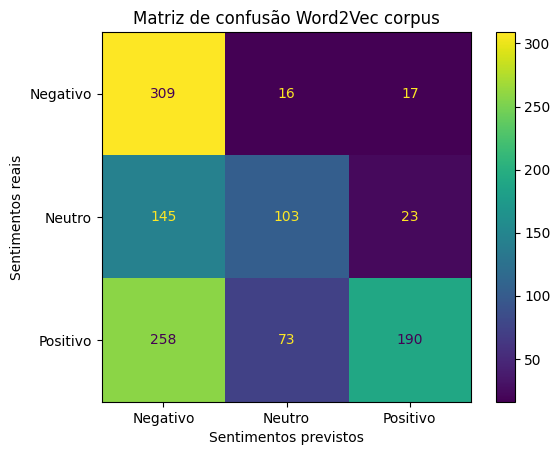

In [12]:
# Criando a matriz e definindo nomes para colunas
cm_corpus = ConfusionMatrixDisplay(confusion_matrix_corpus, display_labels=['Negativo', 'Neutro', 'Positivo'])
cm_corpus.plot()
cm_corpus.ax_.set(
                title='Matriz de confusão Word2Vec corpus', 
                xlabel='Sentimentos previstos', 
                ylabel='Sentimentos reais')
plt.show()

## Naive Bayes com o word2vec utilizando vetores pré-treinados


Nesta etapa iremos utilizar o corpus que já veio vetorizado do site da NILC. 

In [13]:
# Abrindo o dataframe 
df_cbow = pd.read_csv('../output/word2vec_cbow.csv', index_col=0)

In [14]:
# Removendo NaN das bases para facilitar o treinamento 
df_cbow_NaN = df_cbow.dropna()
df_cbow_NaN

,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,Vetor10,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
Frase,,,,,,,,,,,,,,,,,,,,,
"['minuto', 'touro', 'ouro']",0.194111,-0.086163,0.150576,-0.034733,-0.066786,0.122470,0.027893,0.064956,0.005728,0.135925,...,0.046650,-0.142142,0.131115,0.063196,0.025213,0.094671,-0.001749,-0.002428,0.263365,1
['sim'],0.109873,-0.062076,0.187268,-0.213734,0.046350,0.118452,-0.025577,-0.149704,0.143837,0.184814,...,0.031963,-0.051879,0.235329,-0.005905,0.000182,-0.029570,-0.064395,-0.025853,0.185357,0
"['queria', 'saber', 'banking']",0.114653,-0.154823,0.213298,-0.070127,0.017422,0.120094,0.008558,0.016445,0.034044,0.081284,...,0.023741,-0.061997,0.112366,0.059400,-0.006027,0.117726,-0.055369,-0.011474,0.152972,1
"['palmas', 'palmas', 'palmas', 'palmas']",0.215186,-0.092701,0.254579,-0.083714,0.099877,0.371233,0.050387,-0.127568,0.118620,0.129699,...,-0.090724,0.021903,0.221911,0.072890,0.119573,-0.004307,-0.091760,0.027266,0.144531,1
"['vamos', 'ajudar', 'brasil', 'principal', 'categoria', 'automobilismo', 'do']",0.204283,-0.116142,0.207498,-0.040869,0.002747,0.203083,0.013339,0.027435,0.052543,0.107897,...,-0.011755,-0.058785,0.153089,0.070365,-0.001163,0.095111,-0.030487,0.005549,0.144212,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['excelente', 'explicação']",0.156762,-0.134906,0.226852,-0.045667,0.064145,0.179836,0.001532,-0.080106,-0.059974,0.147371,...,-0.077624,0.021257,0.139206,0.068294,0.009093,0.062578,-0.032271,-0.032976,0.160159,-1
"['tá', 'diminuído', 'limite', 'do', 'cartão', 'sempre', 'pagamos', 'fatura', 'dia']",0.167840,-0.116767,0.164306,-0.076104,0.005502,0.163799,-0.007834,-0.001640,0.070826,0.101865,...,-0.000848,-0.052661,0.149399,0.086086,0.036590,0.057364,-0.037924,0.033811,0.165939,-1
"['atendam', 'telefone', 'amor', 'deus']",0.136519,-0.113854,0.161438,-0.110917,0.034236,0.139376,0.029379,-0.063767,0.037123,0.126380,...,0.000793,-0.079159,0.139690,0.086531,0.027053,0.063675,-0.031798,0.055869,0.187216,-1


### Separando o dataset em treino e teste

In [15]:
target_cbow = df_cbow_NaN['sentimento']

In [16]:
features_cbow = df_cbow_NaN.iloc[:,0:50]
features_cbow

,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,Vetor10,...,Vetor41,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50
Frase,,,,,,,,,,,,,,,,,,,,,
"['minuto', 'touro', 'ouro']",0.194111,-0.086163,0.150576,-0.034733,-0.066786,0.122470,0.027893,0.064956,0.005728,0.135925,...,-0.161490,0.046650,-0.142142,0.131115,0.063196,0.025213,0.094671,-0.001749,-0.002428,0.263365
['sim'],0.109873,-0.062076,0.187268,-0.213734,0.046350,0.118452,-0.025577,-0.149704,0.143837,0.184814,...,-0.314112,0.031963,-0.051879,0.235329,-0.005905,0.000182,-0.029570,-0.064395,-0.025853,0.185357
"['queria', 'saber', 'banking']",0.114653,-0.154823,0.213298,-0.070127,0.017422,0.120094,0.008558,0.016445,0.034044,0.081284,...,-0.210730,0.023741,-0.061997,0.112366,0.059400,-0.006027,0.117726,-0.055369,-0.011474,0.152972
"['palmas', 'palmas', 'palmas', 'palmas']",0.215186,-0.092701,0.254579,-0.083714,0.099877,0.371233,0.050387,-0.127568,0.118620,0.129699,...,-0.310632,-0.090724,0.021903,0.221911,0.072890,0.119573,-0.004307,-0.091760,0.027266,0.144531
"['vamos', 'ajudar', 'brasil', 'principal', 'categoria', 'automobilismo', 'do']",0.204283,-0.116142,0.207498,-0.040869,0.002747,0.203083,0.013339,0.027435,0.052543,0.107897,...,-0.262796,-0.011755,-0.058785,0.153089,0.070365,-0.001163,0.095111,-0.030487,0.005549,0.144212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['excelente', 'explicação']",0.156762,-0.134906,0.226852,-0.045667,0.064145,0.179836,0.001532,-0.080106,-0.059974,0.147371,...,-0.281259,-0.077624,0.021257,0.139206,0.068294,0.009093,0.062578,-0.032271,-0.032976,0.160159
"['tá', 'diminuído', 'limite', 'do', 'cartão', 'sempre', 'pagamos', 'fatura', 'dia']",0.167840,-0.116767,0.164306,-0.076104,0.005502,0.163799,-0.007834,-0.001640,0.070826,0.101865,...,-0.226971,-0.000848,-0.052661,0.149399,0.086086,0.036590,0.057364,-0.037924,0.033811,0.165939
"['atendam', 'telefone', 'amor', 'deus']",0.136519,-0.113854,0.161438,-0.110917,0.034236,0.139376,0.029379,-0.063767,0.037123,0.126380,...,-0.187910,0.000793,-0.079159,0.139690,0.086531,0.027053,0.063675,-0.031798,0.055869,0.187216


In [17]:
X_train, X_test, y_train, y_test = train_test_split(features_cbow, target_cbow, test_size=0.2, random_state=42)


### Avaliação do modelo

In [18]:
# Naive Bayes

clf = GaussianNB()

# Treinando o modelo com os dados de teste 
clf = clf.fit(X_train,y_train.values.ravel())

# Prevendo a resposta do dataset
Y_pred = clf.predict(X_test)

print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

          -1       0.43      0.87      0.58       342
           0       0.48      0.41      0.44       271
           1       0.83      0.35      0.49       521

    accuracy                           0.52      1134
   macro avg       0.58      0.54      0.50      1134
weighted avg       0.63      0.52      0.50      1134



In [19]:
acc_score = accuracy_score(y_test, Y_pred)
format_output = "{:.2%}".format(acc_score)
print("A precisão foi de :",format_output) 

A precisão foi de : 51.94%


### Matriz de confusão

A matriz de confusão tem como objetivo, comparar as predições do modelo com o dataset real. De tal forma, nesse problema de multiclassificação é possível ter um panorama geral das respostas e se o modelo tem algum viés ou não.

In [20]:
# Criando uma matriz de confusão 
confusion_matrix_cbow = metrics.confusion_matrix(y_test, Y_pred)

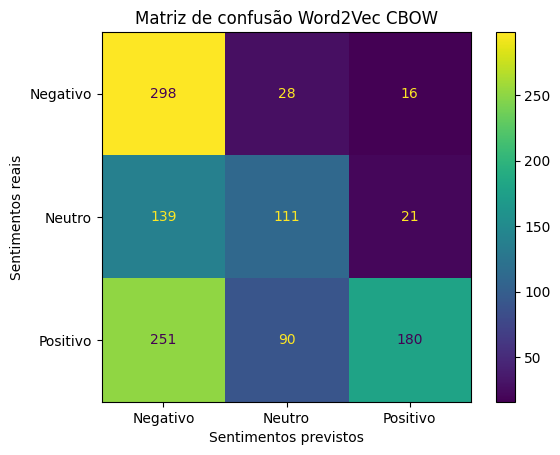

In [21]:
# Criando a matriz e definindo nomes para colunas
cm_cbow = ConfusionMatrixDisplay(confusion_matrix_cbow, display_labels=['Negativo', 'Neutro', 'Positivo'])
cm_cbow.plot()
cm_cbow.ax_.set(
                title='Matriz de confusão Word2Vec CBOW', 
                xlabel='Sentimentos previstos', 
                ylabel='Sentimentos reais')
plt.show()